# Clustering Case Study: Customer Segmentation with K-Means -  Tier 3
***
This case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog. Please feel free to refer to the post for additional information, and solutions.

Structure of the mini-project:

1. **Sourcing and loading**
    * Load the data
    * Explore the data


2. **Cleaning, transforming and visualizing**
    * Data Wrangling: Exercise Set 1
        - Creating a matrix with a binary indicator for whether they responded to a given offer
        - Ensure that in doing so, NAN values are dealt with appropriately
    

3. **Modelling** 
    * K-Means clustering: Exercise Sets 2 and 3
        - Choosing K: The Elbow method
        - Choosing K: The Silhouette method
        - Choosing K: The Gap statistic method
    
    * Visualizing clusters with PCA: Exercise Sets 4 and 5


4. **Conclusions and next steps**
    * Conclusions
    * Other clustering algorithms (Exercise Set 6)

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)

C:\Users\Mark\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### 1b. Explore the data

In [3]:
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [23]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions

C:\Users\Mark\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1
...,...,...,...
319,Fisher,11,1
320,Fisher,22,1
321,Fisher,28,1
322,Fisher,30,1


## 2. Cleaning, transforming and visualizing
### 2a. Data Wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [5]:
#your turn
merged_df = df_transactions.merge(df_offers, how = 'left', on = 'offer_id')
table = pd.pivot_table(merged_df, values = 'n', index = 'customer_name', columns = 'offer_id')
table = table.fillna(0)
table.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3. Modelling 
### 3a. K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

#### 3ai. Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

**Hint:** the Elbow Method is discussed in part 2 of the Harvard Clustering lecture. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

Smaller values of SS represent tighter clusterings.  Smaller SS means smaller distances between data points to the cluster centroids. 

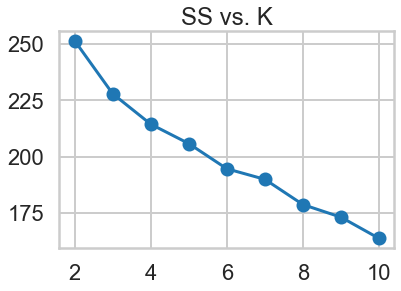

In [6]:
# your turn
from sklearn.cluster import KMeans

x_cols = table.to_numpy()

Kvalues = range(2,11)
SSvalues = []
for K in Kvalues:
    model = KMeans(n_clusters=K)
    model.fit_predict(x_cols)
    SSvalues.append(model.inertia_)

_ = plt.plot(Kvalues,SSvalues)
_ = plt.scatter(Kvalues,SSvalues)
_ = plt.title('SS vs. K')



Based on this plot of Inertia vs. K value, there is not a very strong elbow, and Inertia still continues to decrease significantly as K goes up.  So this graph is overall not very informative on which K value we should choose.

Let us choose K = 6 and construct a bar chart showing number of points in each cluster:

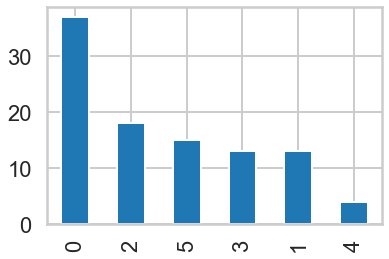

In [7]:


model = KMeans(n_clusters=6)
labels = model.fit_predict(x_cols)

label_series = pd.Series(labels)
label_counts = label_series.value_counts()
_ = label_counts.plot(kind='bar')



#### 3aii. Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

**Hint**: Scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

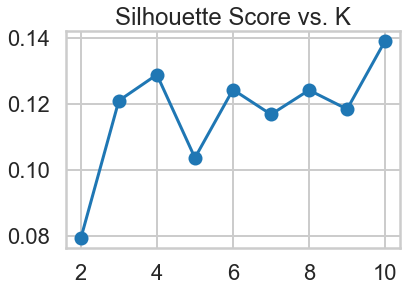

In [8]:
# Your turn.
from sklearn.metrics import silhouette_score

silh_values = []

for K in Kvalues:
    model = KMeans(n_clusters=K)
    labels = model.fit_predict(x_cols)
    silh_values.append(silhouette_score(x_cols,labels))
    
_ = plt.plot(Kvalues,silh_values)
_ = plt.scatter(Kvalues,silh_values)
_ = plt.title('Silhouette Score vs. K')

This plot is also inconclusive with regards to what the best K to choose is.  These silhouette scores are all less than 0.25, which indicates that there is no substantial structure found.  So, the silhouette scores do not lead us to any better conclusions than the Sum of Squares metric.

#### 3aiii.  Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

#### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

**Hint:** See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

### 3b. Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

**Hint:** PCA was discussed in the previous subunit. If you need help with it, consult [this useful article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) and [this visual explanation](http://setosa.io/ev/principal-component-analysis/). 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


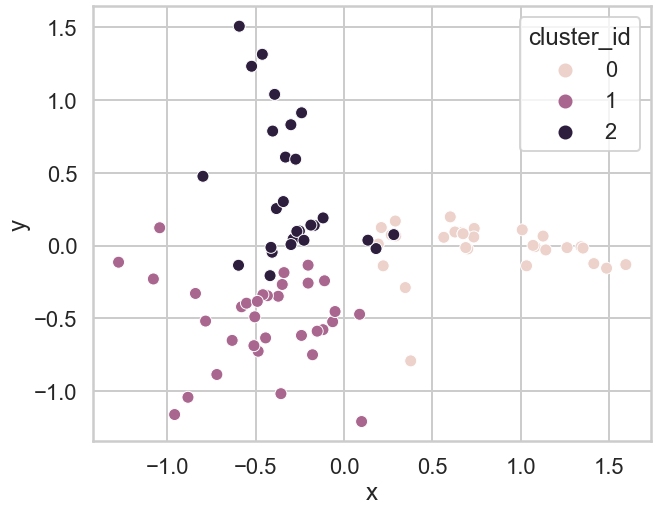

In [9]:
#your turn
from sklearn.decomposition import PCA

model = KMeans(n_clusters=3)
labels = model.fit_predict(x_cols)

pca_model = PCA(n_components=2)
transformed_x = pca_model.fit_transform(x_cols)

df = pd.DataFrame(table.reset_index()['customer_name'])
df['cluster_id']=labels
df['x']=transformed_x[:,0]
df['y']=transformed_x[:,1]

_=plt.figure(figsize=[10,8])
_=sns.scatterplot('x','y',hue='cluster_id',data=df)

From visual inspection and manually trying out different values of K, it was found that 3 clusters produces the best clusters.  When K > 3, clusters start to overlap each other.

In [22]:
'''
names_0 = df[df['cluster_id']==0]['customer_name'].to_numpy()

reset_table = table.reset_index()
names_all = reset_table['customer_name'].to_numpy()

for name in names_all:
    print(name in names_0)
'''
reset_table = table.reset_index()
merge_table_df = reset_table.merge(df,how='left',on='customer_name')

cluster_0 = merge_table_df[merge_table_df['cluster_id']==0]
cluster_1 = merge_table_df[merge_table_df['cluster_id']==1]
cluster_2 = merge_table_df[merge_table_df['cluster_id']==2]

cluster_0


,customer_name,1,2,3,4,5,6,7,8,9,...,30,31,32,cluster_id,x,y,AP_labels,SC_labels,AC_labels,DB_labels
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,1.007580,0.108215,0,0,1,0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0,0.699477,-0.022542,3,0,1,2
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.661732,0.090308,7,0,1,2
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0,1.079827,-0.007488,2,0,1,2
12,Carter,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0,1.260763,-0.014255,2,0,1,2
14,Collins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0.193998,0.010306,4,0,1,-1
18,Cruz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0.736155,0.117752,0,0,1,0
20,Diaz,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0,1.412247,-0.123874,2,0,1,2
30,Green,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0.292635,0.066399,3,0,1,3
31,Gutierrez,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.346529,-0.288514,7,0,1,-1


In [11]:
cluster_0.sum()

customer_name    AdamsBaileyBennettBrownCarterCollinsCruzDiazGr...
1                                                              0.0
2                                                              0.0
3                                                              2.0
4                                                              0.0
5                                                              0.0
6                                                              1.0
7                                                             16.0
8                                                             13.0
9                                                              0.0
10                                                             2.0
11                                                             1.0
12                                                             1.0
13                                                             6.0
14                                                            

In [12]:
cluster_1.sum()

customer_name    BakerBarnesBrooksButlerClarkDavisEvansFisherFo...
1                                                              8.0
2                                                              2.0
3                                                              4.0
4                                                             10.0
5                                                              2.0
6                                                             10.0
7                                                              3.0
8                                                              3.0
9                                                              5.0
10                                                             4.0
11                                                             9.0
12                                                             2.0
13                                                             0.0
14                                                            

In [13]:
cluster_2.sum()

customer_name    AllenAndersonBellCampbellCookCooperCoxEdwardsF...
1                                                              2.0
2                                                              8.0
3                                                              0.0
4                                                              2.0
5                                                              2.0
6                                                              1.0
7                                                              0.0
8                                                              4.0
9                                                              5.0
10                                                             1.0
11                                                             3.0
12                                                             2.0
13                                                             0.0
14                                                            

For Cluster 0, the most frequent offers are: 7, 8, 19, 29, and 30.
For Cluster 1, the most frequent offers are: 24, 26, and then 2 and 17.
For Cluster 2, the most frequent offers are: 23 and 31, followed by 4, 6, 9, 11.

In [14]:
#Cluster 0 Preferences:
print(df_offers[df_offers['offer_id']==7])
print(df_offers[df_offers['offer_id']==8])
print(df_offers[df_offers['offer_id']==19])
print(df_offers[df_offers['offer_id']==29])
print(df_offers[df_offers['offer_id']==30])

   offer_id campaign  varietal  min_qty  discount     origin  past_peak
6         7    March  Prosecco        6        40  Australia       True
   offer_id campaign   varietal  min_qty  discount        origin  past_peak
7         8    March  Espumante        6        45  South Africa      False
    offer_id campaign   varietal  min_qty  discount   origin  past_peak
18        19     July  Champagne       12        66  Germany      False
    offer_id  campaign      varietal  min_qty  discount  origin  past_peak
28        29  November  Pinot Grigio        6        87  France      False
    offer_id  campaign varietal  min_qty  discount  origin  past_peak
29        30  December   Malbec        6        54  France      False


For Cluster 0's responses to offers, it appears that 'min_qty' tends to have the lowest values (6 and 12).

In [15]:
print(df_offers[df_offers['offer_id']==24])
print(df_offers[df_offers['offer_id']==26])
print(df_offers[df_offers['offer_id']==2])
print(df_offers[df_offers['offer_id']==17])

    offer_id   campaign    varietal  min_qty  discount origin  past_peak
23        24  September  Pinot Noir        6        34  Italy      False
    offer_id campaign    varietal  min_qty  discount     origin  past_peak
25        26  October  Pinot Noir      144        83  Australia      False
   offer_id campaign    varietal  min_qty  discount  origin  past_peak
1         2  January  Pinot Noir       72        17  France      False
    offer_id campaign    varietal  min_qty  discount   origin  past_peak
16        17     July  Pinot Noir       12        47  Germany      False


Cluster 1 seems to be very interested in the "Pinot Noir" varietal.

In [16]:
print(df_offers[df_offers['offer_id']==23])
print(df_offers[df_offers['offer_id']==31])
print(df_offers[df_offers['offer_id']==4])
print(df_offers[df_offers['offer_id']==6])
print(df_offers[df_offers['offer_id']==9])
print(df_offers[df_offers['offer_id']==11])

    offer_id   campaign    varietal  min_qty  discount        origin  \
22        23  September  Chardonnay      144        39  South Africa   

    past_peak  
22      False  
    offer_id  campaign   varietal  min_qty  discount  origin  past_peak
30        31  December  Champagne       72        89  France      False
   offer_id  campaign   varietal  min_qty  discount  origin  past_peak
3         4  February  Champagne       72        48  France       True
   offer_id campaign  varietal  min_qty  discount origin  past_peak
5         6    March  Prosecco      144        86  Chile      False
   offer_id campaign    varietal  min_qty  discount origin  past_peak
8         9    April  Chardonnay      144        57  Chile      False
    offer_id campaign   varietal  min_qty  discount  origin  past_peak
10        11      May  Champagne       72        85  France      False


Cluster 2 seems to prefer wines that have a high 'min_qty' value (72, 144). 

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

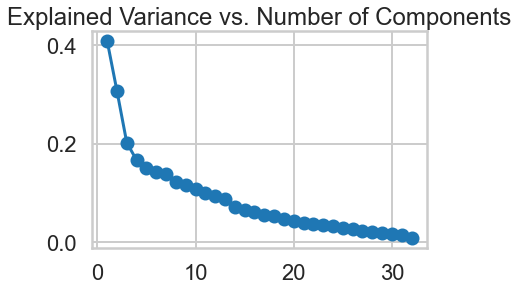

In [17]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)
dimensions = range(1,33)
_ = plt.plot(dimensions,pca.explained_variance_)
_ = plt.scatter(dimensions,pca.explained_variance_)
_ = plt.title('Explained Variance vs. Number of Components')

The elbow appears to take place at 4 components, which implies that 4 is the most optimal number of dimensions.

## 4. Conclusions and next steps
### 4a. Conclusions
What can you conclude from your investigations? Make a note, formulate it as clearly as possible, and be prepared to discuss it with your mentor in your next call. 

From our clustering analysis, there arose two primary attributes of interest.  One cluster seemed to really enjoy the "Pinot Noir" variety of wine.  Another attribute of interest is the "min_qty".  There was one cluster surrounded at low min_qty, and another cluster surrounded at high min_qty.

### 4b. Other clustering algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


C:\Users\Mark\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


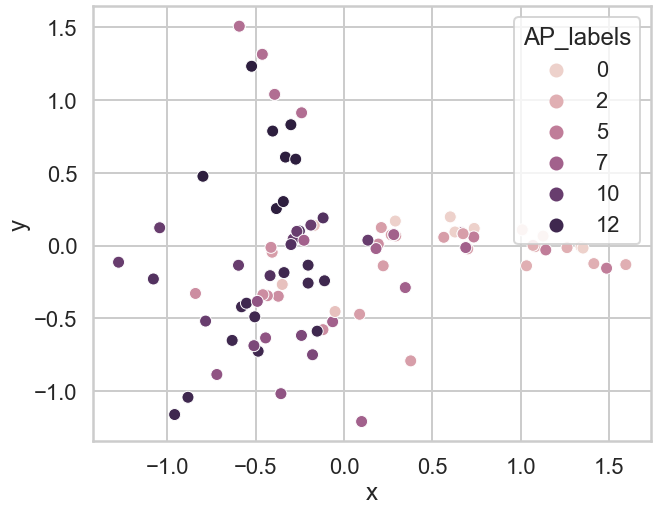

In [18]:
# Your turn

# Affinity Propagation

from sklearn.cluster import AffinityPropagation
affpropmodel = AffinityPropagation(damping=0.6,max_iter=200)
AP_labels = affpropmodel.fit_predict(x_cols)

df['AP_labels'] = AP_labels

_=plt.figure(figsize=[10,8])
_=sns.scatterplot('x','y',hue='AP_labels',data=df)

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


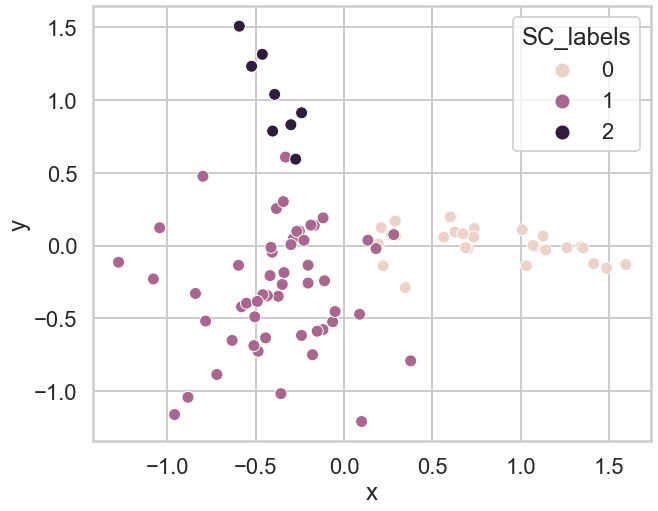

In [19]:
#Spectral Clustering

from sklearn.cluster import SpectralClustering

SCmodel = SpectralClustering(n_clusters=3)
SC_labels = SCmodel.fit_predict(x_cols)

df['SC_labels'] = SC_labels

_=plt.figure(figsize=[10,8])
_=sns.scatterplot('x','y',hue='SC_labels',data=df)

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


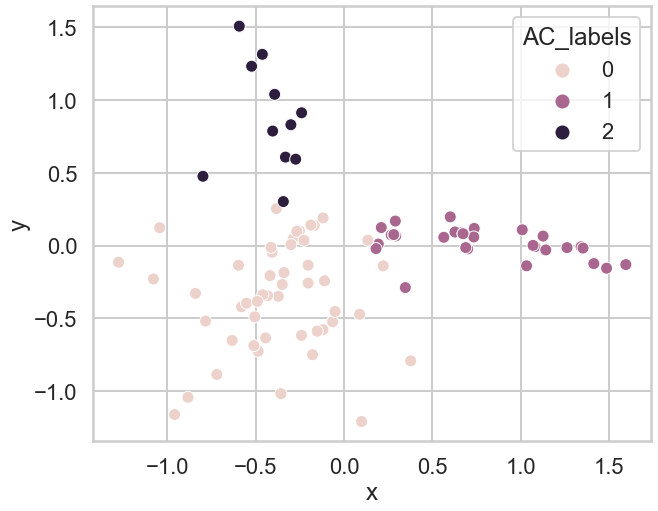

In [20]:
#Agglomerative Clustering 

from sklearn.cluster import AgglomerativeClustering
ACmodel = AgglomerativeClustering(n_clusters=3)
AC_labels = ACmodel.fit_predict(x_cols)

df['AC_labels'] = AC_labels

_=plt.figure(figsize=[10,8])
_=sns.scatterplot('x','y',hue='AC_labels',data=df)

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


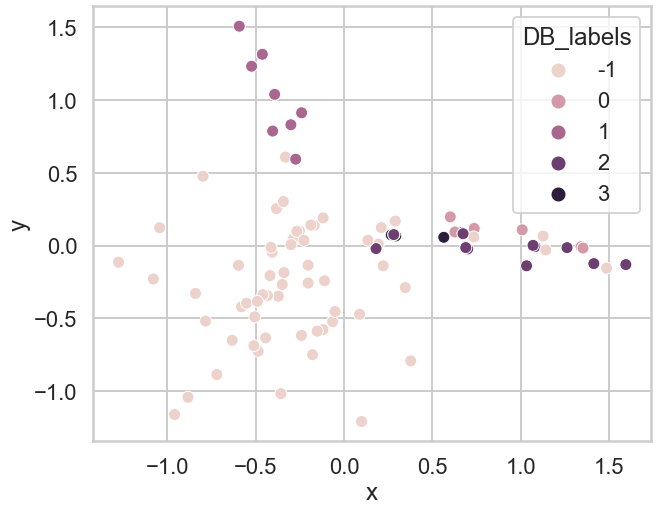

In [21]:
#DBSCAN

from sklearn.cluster import DBSCAN

DBSCANmodel = DBSCAN(eps=1.25)
DB_labels = DBSCANmodel.fit_predict(x_cols)

df['DB_labels'] = DB_labels

_=plt.figure(figsize=[10,8])
_=sns.scatterplot('x','y',hue='DB_labels',data=df)

To determine the clustering performance of each method, we visualized each clustering using 2-Dimensional PCA.

Spectral Clustering and Agglomerative Clustering performed the best, based on the visualization.  We were able to specify the number of clusters as 3, and we produced similar results to the K-Means clustering where K=3.  Spectral Clustering is a very similar method to K-Means clustering.  Agglomerative Clustering is a more versatile clustering method that could potentially be applied in many situations with more clusters.  However, when more clusters were specified for Agglomerative Clustering, we ran into trouble, similar to K-Means.  Perhaps some other parameters could be played with to produce more meaningful clusters.

DBSCAN was harder to use and did not produce crisp clusters.  As a density-based method, perhaps DBSCAN performs better when points are more concentrated around certain regions of the visual space.  In the data used here though, there isn't really a high density concentration of points at any particular region, limiting the effectiveness of DBSCAN.

Affinity Propagation was the worst method.  This clustering algorithm came up with 7 clusters that overlapped and overfitted.  